In [31]:
import numpy as np 
import matplotlib.pyplot as plt 
import ugradio as ug 


In [32]:
import numpy as np

def _compute_dft(in_x,in_y,out_x,inverse=False):
    if not inverse:
        in_y = np.fft.fftshift(in_y) 
        j = -1j
    else:
        in_y = in_y*(1.0/len(in_x))
        j = 1j

    N = len(in_x)
    out_y = np.zeros(len(out_x),dtype=np.complex128)
    for k,f in enumerate(out_x):
        out_y[k] = np.sum(in_y*np.exp(2*j*np.pi*f*in_x))

    return out_y
            
def dft(xt,t=[],f=[],vsamp=1):
    """
    Input 
    -----
    xt    : complex array, input time domain signal
    t     : (opt.) real array, input sample times. 
    f     : (opt.) real array, output sample frequencies
    vsamp : (opt.) float, sampling frequency
            default: 1
    Output
    ------
    Fx    : The discrete fourier transform of the input array

    """
    N = len(xt)
    if (len(t)):
        assert(len(t) == N), "Samples and sample times do not match!"
    else:
        t = np.linspace(-N/(2.0*vsamp),N/(2.0*vsamp),num=N,endpoint=False)

    if not (len(f)):
        vsamp = N/float(np.ceil(t.max() - t.min()))
        f = np.linspace(-vsamp/2.,vsamp/2.,num=N,endpoint=False)
    
    Fx = _compute_dft(t,xt,f)

    return f,Fx

def idft(Fx,f=[],t=[],vsamp=1):
    """
    Input
    -----
    Fx    : complex array, input frequency domain signal
    f     : (opt.) real array, input sample frequencies
    t     : (opt.) real array, output sample times
    
    Output
    ------
    xt: The time domain signal of the input array

    """
    N = len(Fx)
    if (len(f)):
        assert(len(f) == N), "Samples and sample frequencies do not match!"
    else:
        f = np.linspace(-vsamp/2.,vsamp/2.,num=N,endpoint=False)

    if not (len(t)):
        T = N/float(np.ceil(f.max()) - f.min())
        t = np.linspace(-T/2.0,T/2.0,num=N,endpoint=False)
    
    xt = _compute_dft(f,Fx,t,inverse=True)

    return t,xt



In [33]:
ARR = []
for i in range(1,10):
    name = "lab1" + '_%s' % i + '0p_1' + '.npy' 
    ARR.append(np.load(name))
   


In [34]:
def digital_sampling(N):
    time = np.arange(0,N)
    for i in range(1,10):
        plt.figure(figsize=(20,20))
        num = 910 + i
        plt.subplot(num)
        plt.plot(time,ARR[i-1][0:N])
        plt.xlabel("Time", fontsize= 20)
        plt.ylabel("Voltages", fontsize = 20)
        plt.title(str(i) + '0% of Sampling frequency of 12.5MHz')
        plt.show()


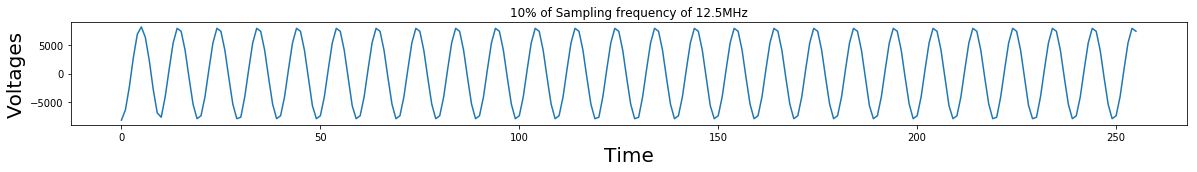

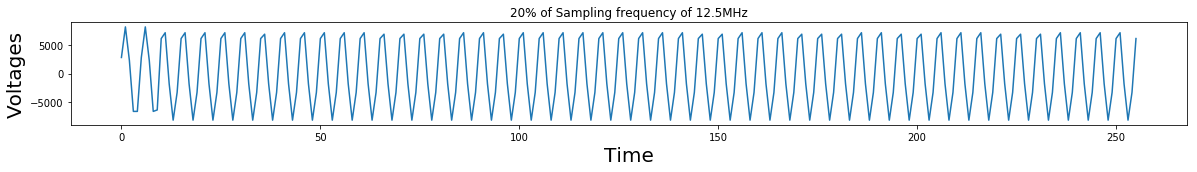

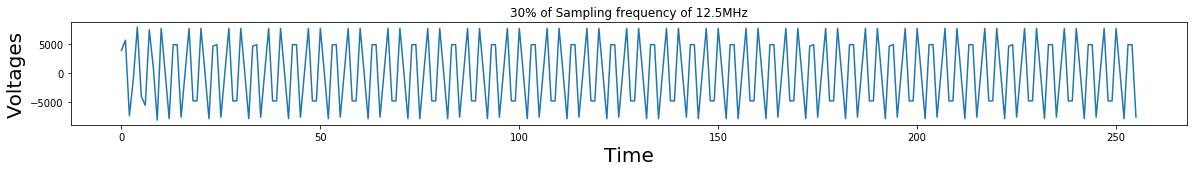

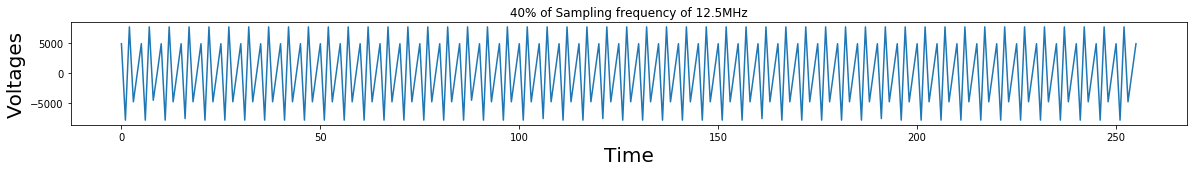

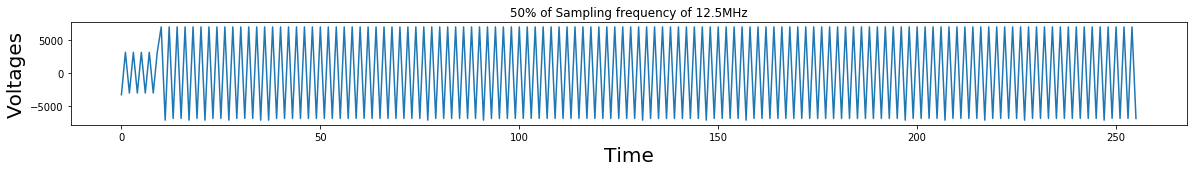

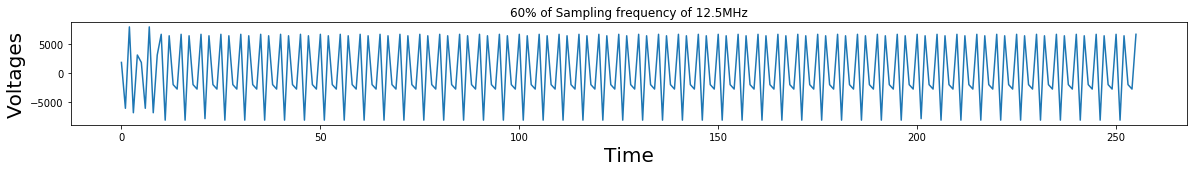

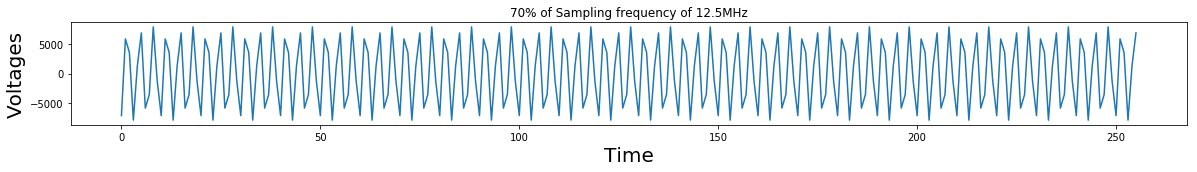

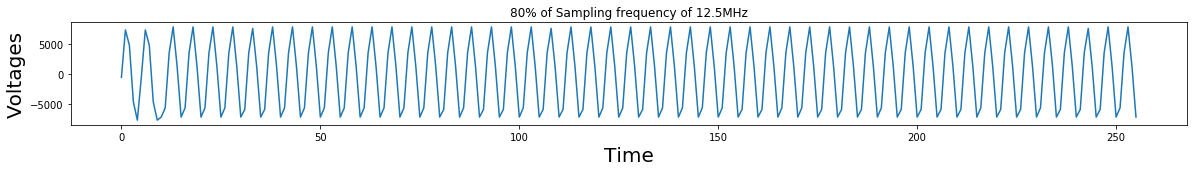

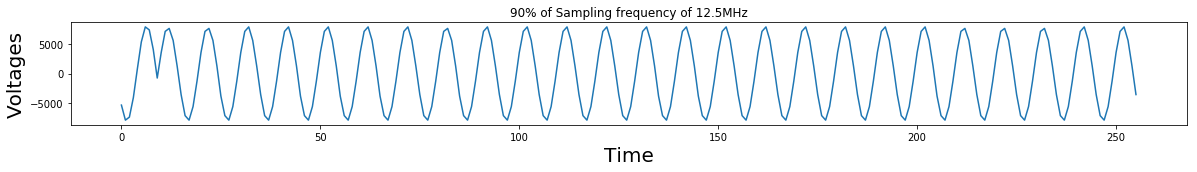

In [36]:
digital_sampling(2**8)

In [37]:
def digital_sampling_normalize(N):
    time = np.arange(0,N)
    for i in range(1,10):
        plt.figure(figsize=(20,20))
        num = 910 + i
        plt.subplot(num)
        plt.plot(time,ARR[i-1][0:N]/2**15)
        plt.xlabel("Time", fontsize= 20)
        plt.ylabel("Voltages", fontsize = 20)
        plt.title(str(i) + '0% of Sampling frequency of 12.5MHz')
        plt.show()

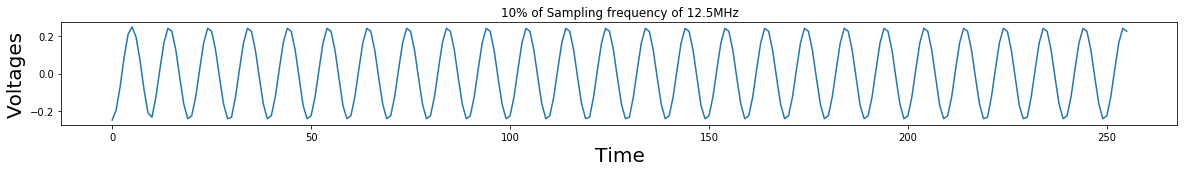

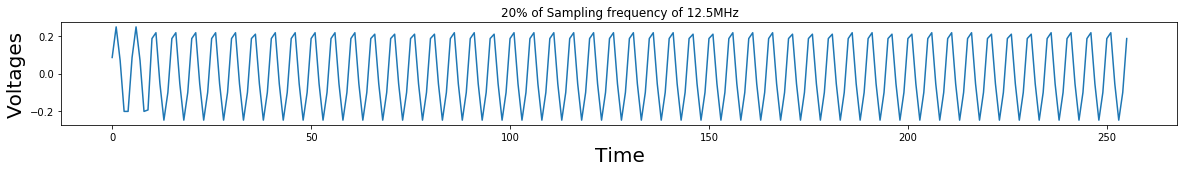

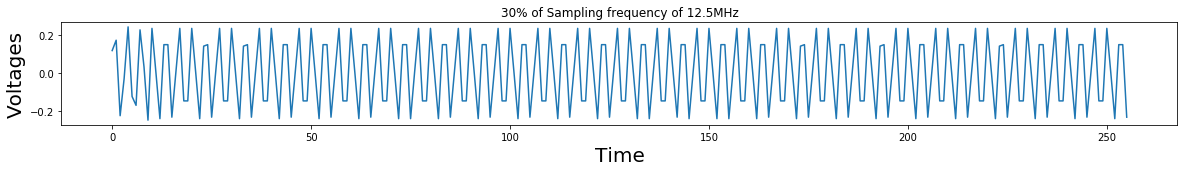

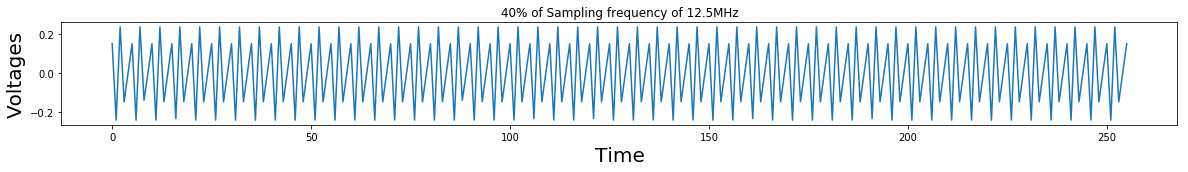

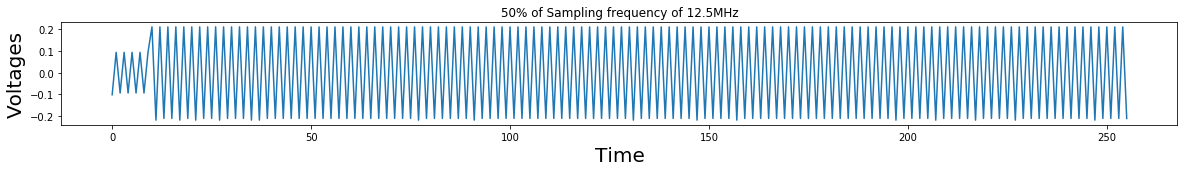

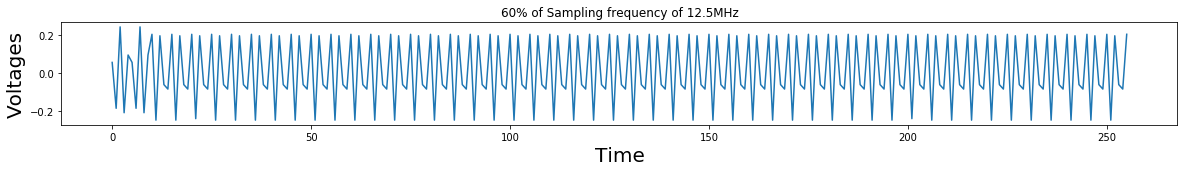

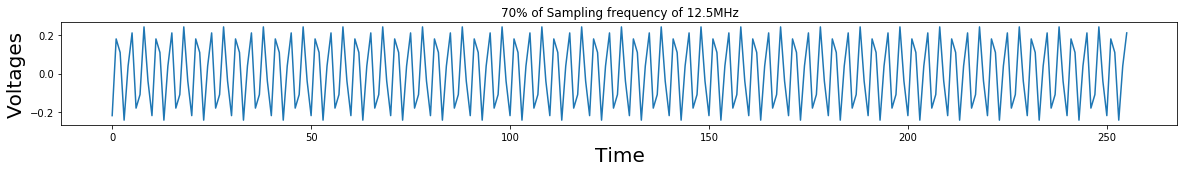

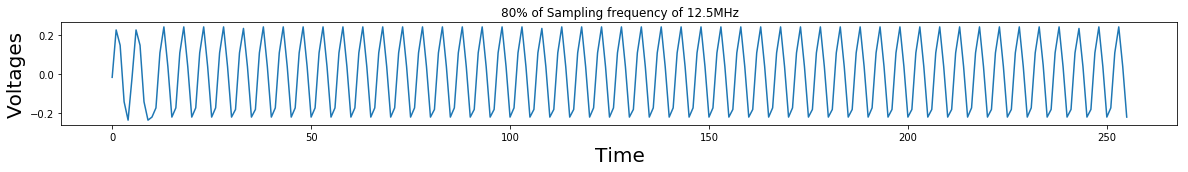

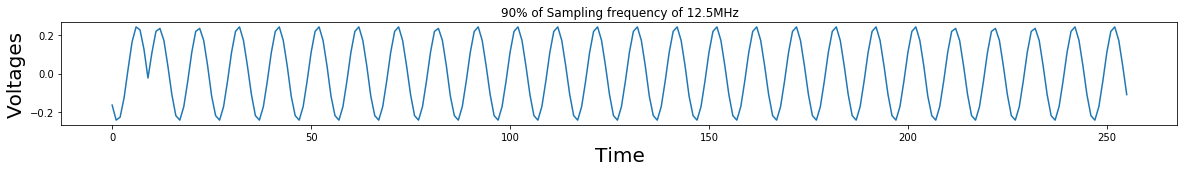

In [38]:
digital_sampling_normalize(2**8)

In [35]:
import ugradio as ug


In [9]:
N=2**8 #samples
v_samp = 12.5e6
t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N)
f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)



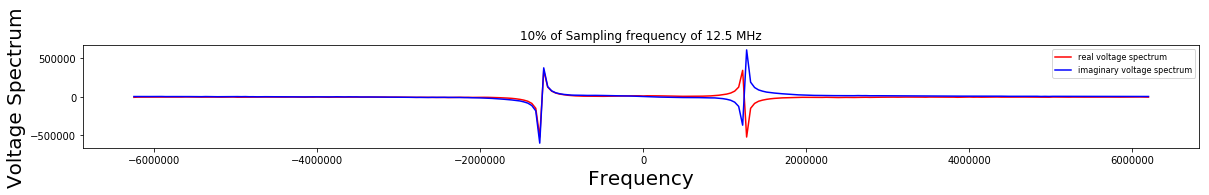

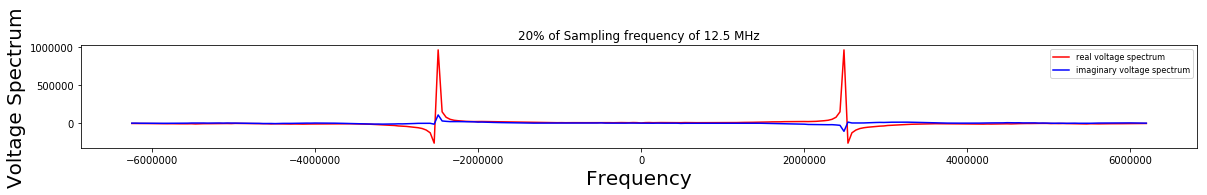

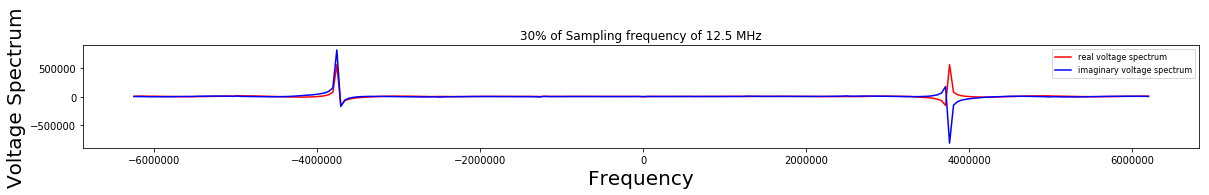

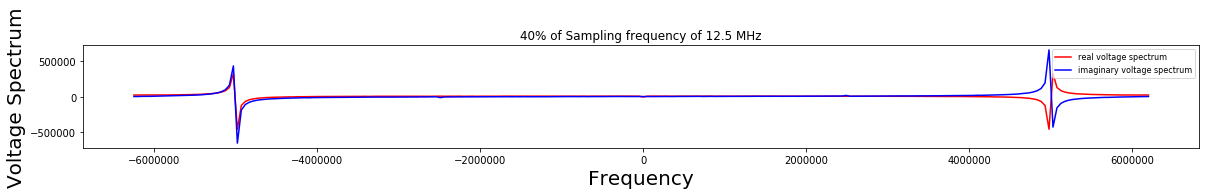

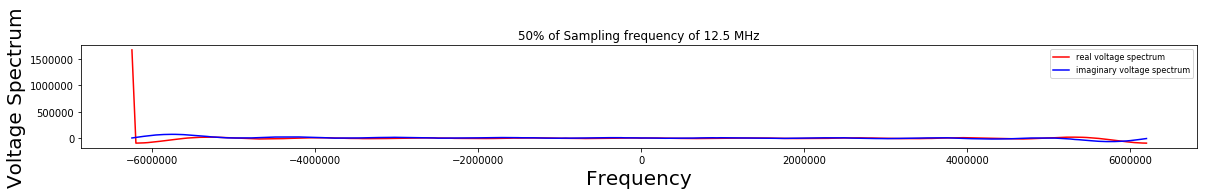

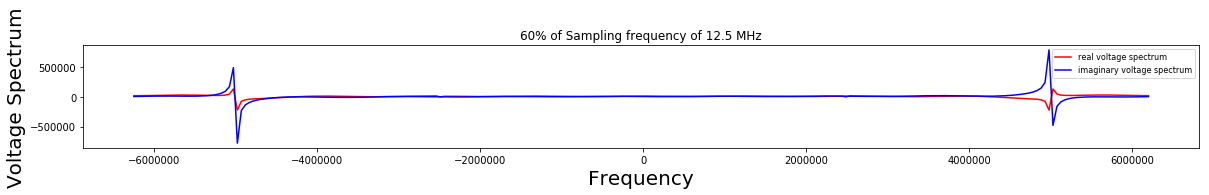

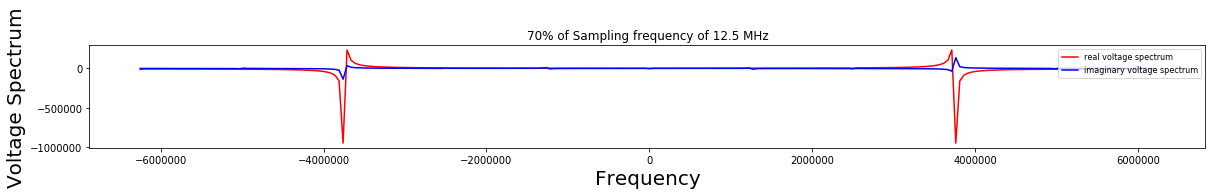

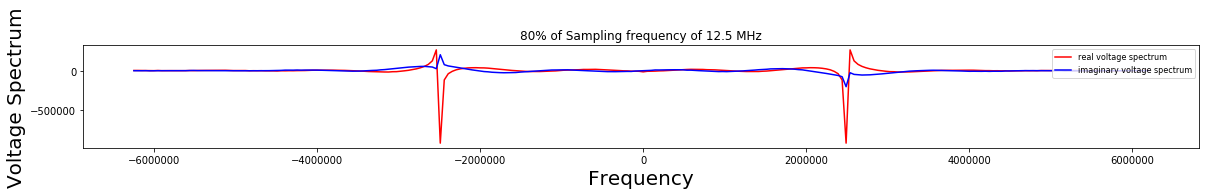

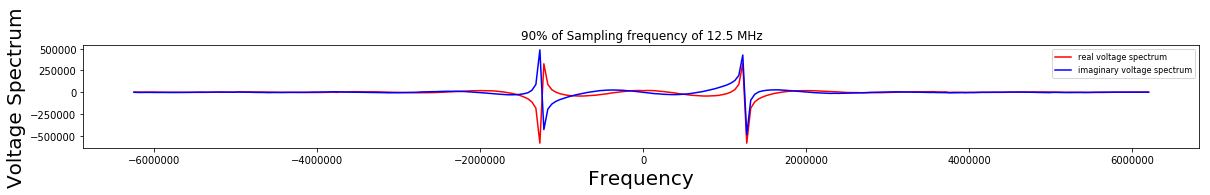

In [41]:
for i in range(1,10):
    F = dft(ARR[i-1][0:N],t,f,vsamp=12.5e6)
    real = []
    imag = []
    for num in F[1]:
        real.append(num.real)
        imag.append(num.imag)
    plt.figure(figsize=(20,20))
    yee = 910 + i
    plt.subplot(yee)
    plt.plot(f,real,'r')
    plt.plot(f,imag,'b')
    plt.xlabel("Frequency",fontsize=20)
    plt.ylabel("Voltage Spectrum",fontsize = 20)
    plt.title(str(i) + "0% of Sampling frequency of 12.5 MHz")
    plt.legend(['real voltage spectrum','imaginary voltage spectrum'],loc='upper right',fontsize=8)
    plt.show()


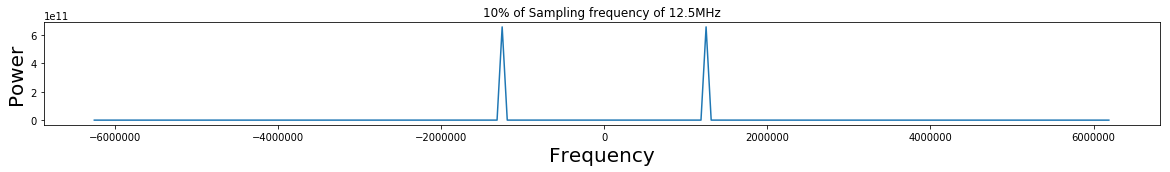

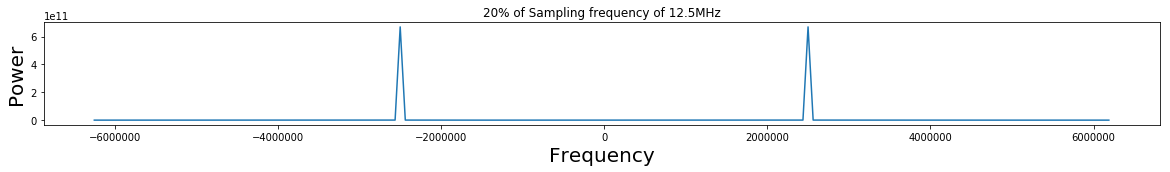

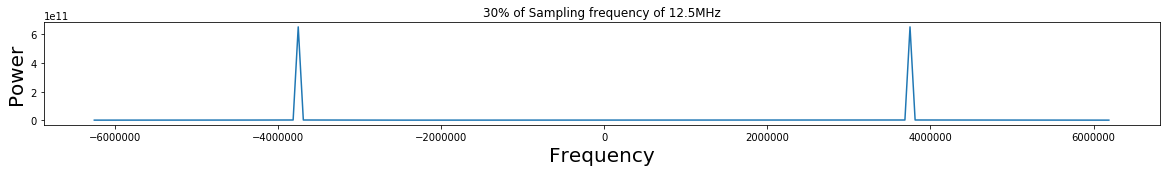

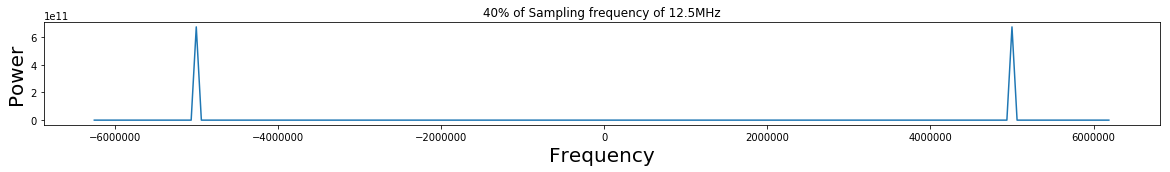

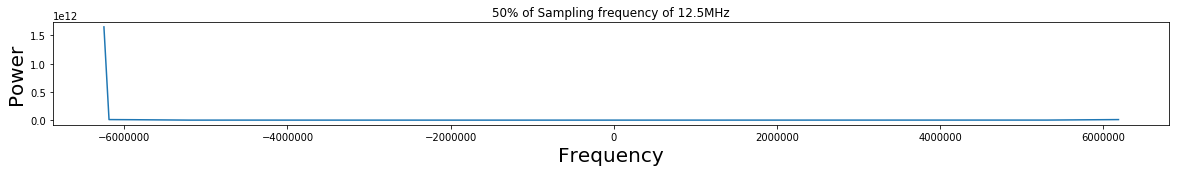

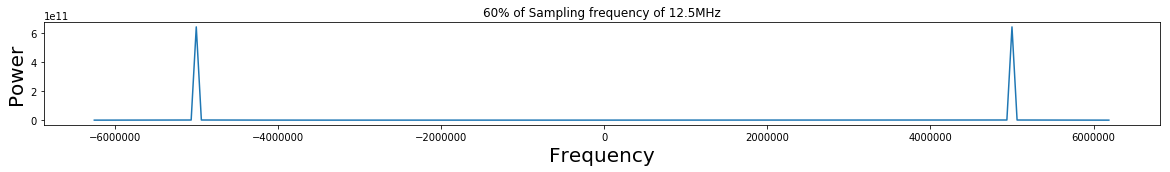

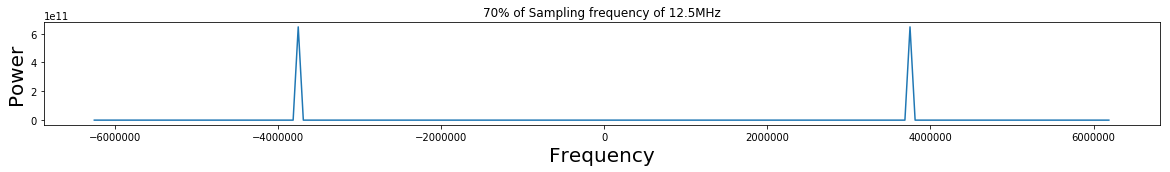

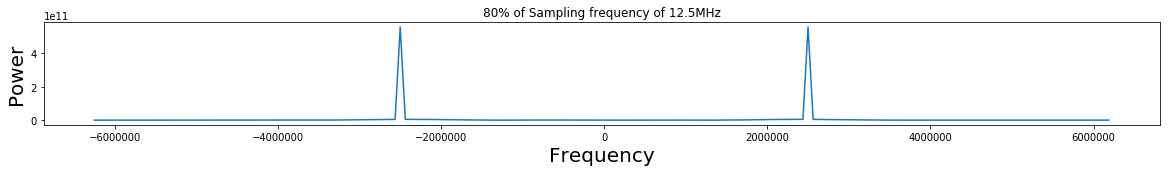

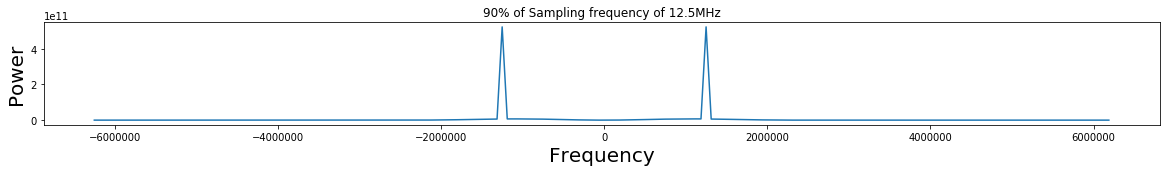

In [15]:
for i in range(1,10):
    PF = []
    EF = dft(ARR[i-1][0:N],t,f,vsamp=12.5e6)
    for comp in EF[1]:
        PF.append(np.abs(comp)**2)
    plt.figure(figsize=(20,20))
    lit = 910 + i
    plt.subplot(lit)
    plt.plot(f,PF)
    plt.xlabel("Frequency", fontsize= 20)
    plt.ylabel("Power", fontsize = 20)
    plt.title(str(i) + '0% of Sampling frequency of 12.5MHz')
    plt.show()